# Assignemnt 3

## Solving the Tower of Hanoi Problem using Markov Decision Process (MDP)

This assignment focuses on applying reinforcement learning techniques to solve the classic Tower of Hanoi puzzle using a Markov Decision Process (MDP). The task involves modeling the puzzle’s states, actions, and transitions, and using a naive policy to compute the value function for the puzzle. Through value iteration, the goal is to determine the optimal sequence of moves to solve the puzzle with the minimum number of steps. Visualizations are used to demonstrate the progression of the puzzle as actions are taken and to illustrate how the value function evolves over iterations.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


### Defineing the Tower of Hanoi Environment

Here, we define the TowerOfHanoi class to represent the environment. This class will handle states, actions, and transitions, as well as visualizations.

In [9]:
class TowerOfHanoi:
    def __init__(self, num_disks=3):
        self.num_disks = num_disks
        # Initial configuration with disks on peg A
        self.pegs = { 'A': list(range(num_disks, 0, -1)), 'B': [], 'C': [] }
        self.goal_state = ('A', 'A', 'A')  # All disks should end up on peg 'C'
        self.actions = []  # History of actions taken

    # This function checks whether all disks have been moved to peg 'C' in the correct order (largest disk at the bottom, smallest at the top).
    def is_goal_state(self):
        return self.pegs['C'] == list(range(self.num_disks, 0, -1))


    # This method handles moving the top disk from one peg to another. If a move is valid (i.e., the disk exists on the peg), it updates the pegs and records the action.
    def move_disk(self, from_peg, to_peg):
        # Move the top disk from one peg to another
        if self.pegs[from_peg]:
            disk = self.pegs[from_peg].pop()
            self.pegs[to_peg].append(disk)
            self.actions.append((from_peg, to_peg))  # Record the move

# Returns the current state of the environment as a tuple of the peg locations.
    def get_state(self):
        # Get the current state as a tuple of peg locations
        return (tuple(self.pegs['A']), tuple(self.pegs['B']), tuple(self.pegs['C']))

    def plot(self):
        # Plot the Tower of Hanoi using matplotlib
        fig, ax = plt.subplots()
        ax.set_xlim(-1, 4)
        ax.set_ylim(-1, self.num_disks + 2)
        ax.set_xticks([0, 1, 2])
        ax.set_xticklabels(['A', 'B', 'C'])

        for peg, disks in self.pegs.items():
            for i, disk in enumerate(disks):
                ax.add_patch(patches.Rectangle((ord(peg) - ord('A'), i), disk, 1, color='orange', lw=2))

        ax.set_title(f"Current State: {self.get_state()}")
        plt.show()


### Defineing the Naive *Policy*

Next, we define the naive policy where the smallest disk is always moved clockwise to the next peg. This policy will help guide the next actions.

In [10]:
def naive_policy(pegs):
    # Naive policy: Move the smallest disk to the next peg clockwise
    for peg in ['A', 'B', 'C']:
        if pegs[peg]:
            disk = pegs[peg][0]
            next_peg = chr((ord(peg) - ord('A') + 1) % 3 + ord('A'))  # Clockwise to the next peg
            return peg, next_peg
    return None  # No valid move


### Defineing the Reward Function

The reward function returns 1 if the goal state is achieved and 0 otherwise.

In [11]:
def reward_function(state, goal_state):
    return 1 if state == goal_state else 0


### Value Iteration for Computing Value Function

Here, we implement the value iteration formula to compute the value function for all states under the naive policy.

In [12]:
def value_iteration(env, gamma=1, max_iterations=1):
    value_function = {}  # Store value for each state
    for _ in range(max_iterations):
        new_value_function = value_function.copy()
        for state in env.get_state():
            action = naive_policy(env.pegs)  # Get action from policy
            if action:
                from_peg, to_peg = action
                env.move_disk(from_peg, to_peg)  # Execute the action
                next_state = env.get_state()  # Get the new state after the move
                reward = reward_function(state, env.goal_state)
                # Update the value function using the Bellman equation
                new_value_function[state] = reward + gamma * value_function.get(next_state, 0)

        value_function = new_value_function  # Update value function after iteration
    return value_function


### : Simulateing the Environment and Calculate the Value Function

Now, we simulate the environment using the above value iteration function.

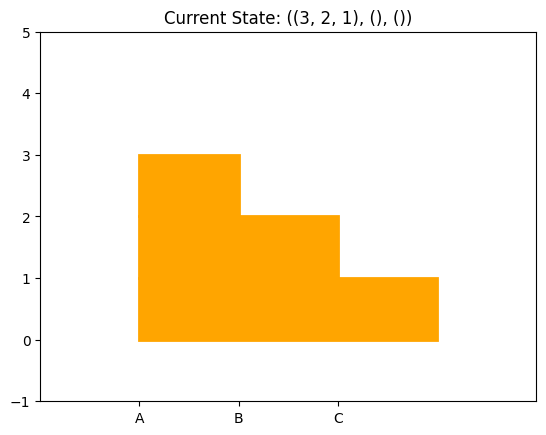

In [13]:
# Initialize environment with 3 disks
env = TowerOfHanoi(num_disks=3)

# Plot the initial state of the Tower of Hanoi
env.plot()

# Run value iteration to calculate the value function
value_function = value_iteration(env)


### Plotting the Tower of Hanoi State after Action

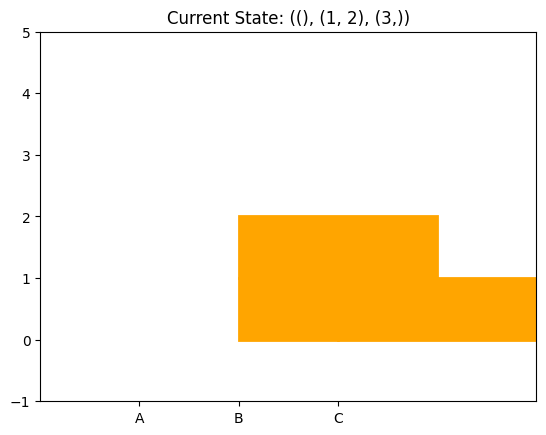

In [14]:
# Perform a sample action based on the naive policy and plot the new state
from_peg, to_peg = naive_policy(env.pegs)
env.move_disk(from_peg, to_peg)
env.plot()  # Plot the new state after the move


### Value Function

we display the value function after one iteration.

In [15]:
# Display the value function after value iteration
print("Value Function:")
for state, value in value_function.items():
    print(f"State {state}: {value}")


Value Function:
State (3, 2, 1): 0
State (): 0
